# **LIMPIEZA DE DATOS CON PYTHON Y PANDAS**

# 1. El set de datos
La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

"age": edad (numérica)
"job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
"marital": estado civil (categórica: "married", "divorced", "single")
"education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
"default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
"balance": saldo promedio anual en euros (numérica)
"housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
"loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
"contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
"day": último día del mes en el que fue contactada (numérica)
"month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
"duration": duración (en segundos) del último contacto (numérica)
"campaign": número total de veces que fue contactada durante la campaña (numérica)
"pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
"previous": número de veces que ha sido contactada antes de esta campaña (numérica)
"poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
"y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# 2. Una primera mirada al dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_bancos = pd.read_csv('../documentos/dataset_banco.csv')
df_bancos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [32]:
df_bancos.shape

(45215, 17)

In [33]:
df_bancos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


# 3. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

In [34]:
###
# Verificación de datos nulos
###
df_bancos.isnull().sum()

age          0
job          2
marital      1
education    1
default      0
balance      2
housing      0
loan         0
contact      0
day          0
month        0
duration     1
campaign     0
pdays        1
previous     0
poutcome     0
y            0
dtype: int64

In [35]:
###
# Eliminación de datos nulos
###
df_bancos.dropna(inplace=True)
df_bancos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


# 3.2 Columnas Irrelevantes

Una columna irrelevante puede ser:

• *Una columna que no contiene información relevante para el problema que queremos resolver*. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
• *Una columna categórica pero con un sólo nivel.* Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
• *Una columna numérica pero con un sólo valor.* Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
• *Columnas con información redundante.* Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [36]:
###
# Separación de columnas categórias y numéricas
###
columnas = list(df_bancos.keys())
cols_categ = [x for x in columnas if df_bancos[x].dtype == 'object']
cols_num = [x for x in columnas if df_bancos[x].dtype != 'object']

In [37]:
###
# Valores únicos categóricos
###
for col in cols_categ:
    print(f'Columna {col}: {df_bancos[col].nunique()} valores únicos')

Columna job: 18 valores únicos
Columna marital: 6 valores únicos
Columna education: 10 valores únicos
Columna default: 2 valores únicos
Columna housing: 2 valores únicos
Columna loan: 6 valores únicos
Columna contact: 5 valores únicos
Columna month: 12 valores únicos
Columna poutcome: 6 valores únicos
Columna y: 2 valores únicos


In [38]:
###
# Valores únicos numéricos metodo: 1
###
for col in cols_num:
  print(f'Columna {col}: {df_bancos[col].nunique()} valores únicos')

Columna age: 85 valores únicos
Columna balance: 7168 valores únicos
Columna day: 31 valores únicos
Columna duration: 1573 valores únicos
Columna campaign: 48 valores únicos
Columna pdays: 559 valores únicos
Columna previous: 41 valores únicos


In [40]:
###
# Valores únicos numéricos metodo: 2 Mirando el std
###
df_bancos.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# 3.3 Duplicados

In [41]:
###
# Eliminación de duplicados
###
print(f'Tamaño antes: {df_bancos.shape}')
df_bancos.drop_duplicates(inplace=True)
print(f'Tamaño despues: {df_bancos.shape}')

Tamaño antes: (45207, 17)
Tamaño despues: (45203, 17)


# 3.4 Outliers en atributos numéricos

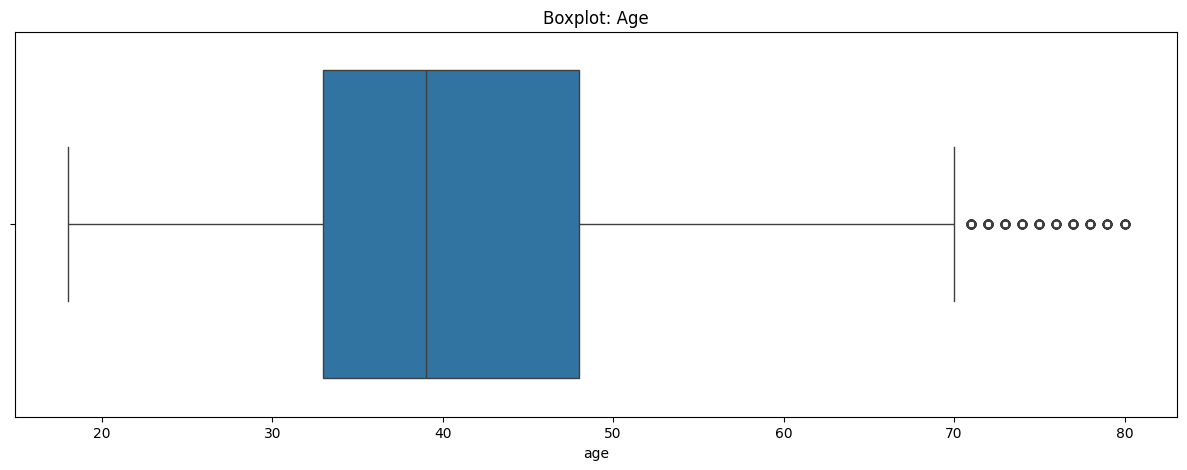

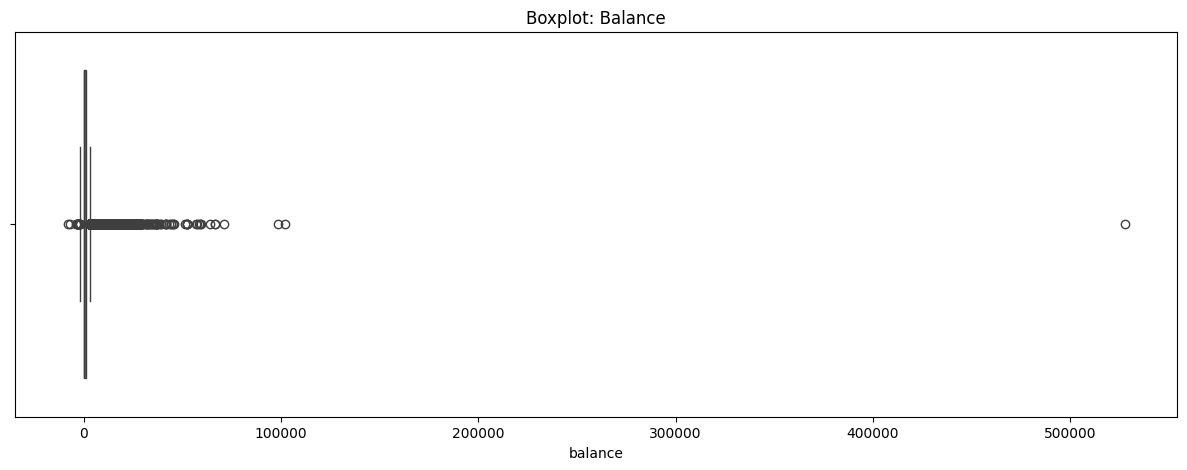

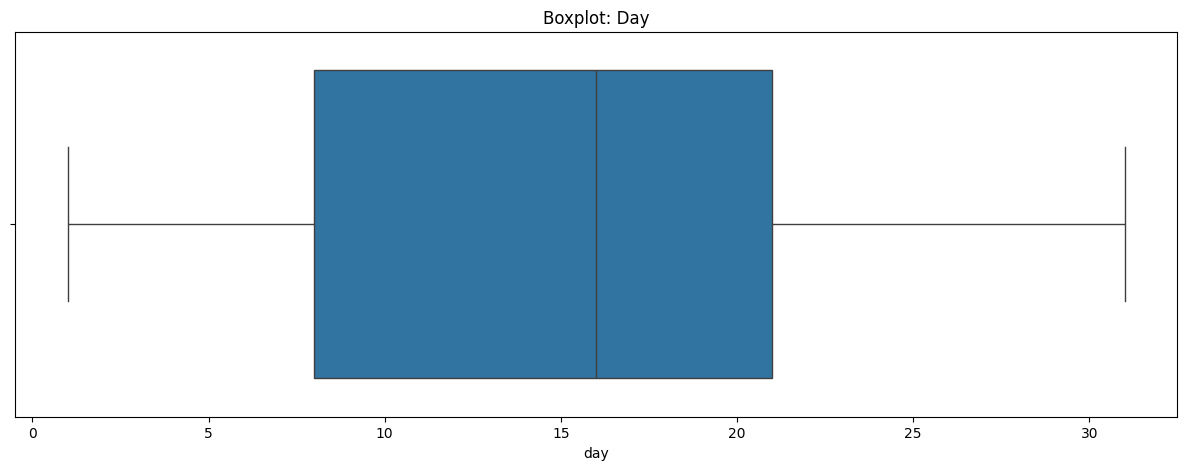

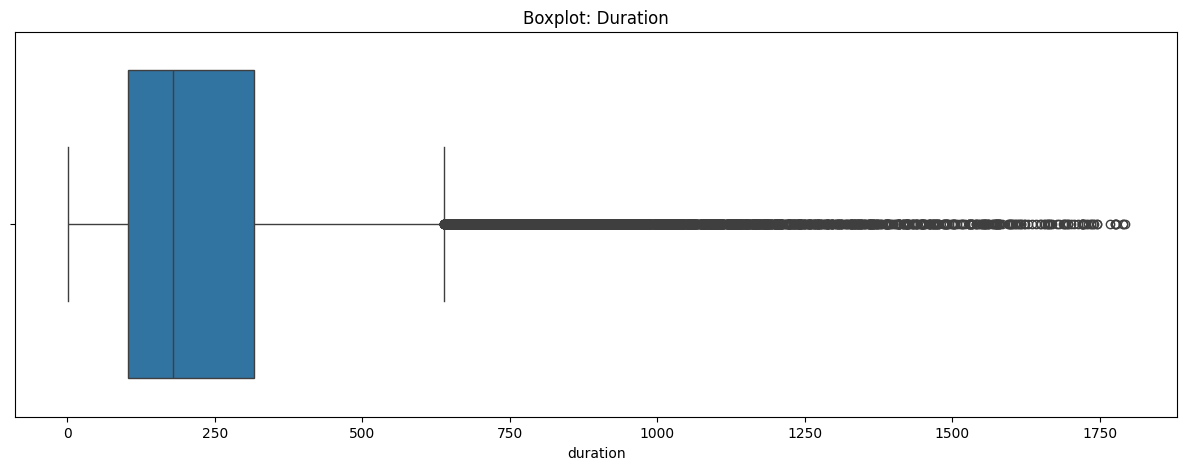

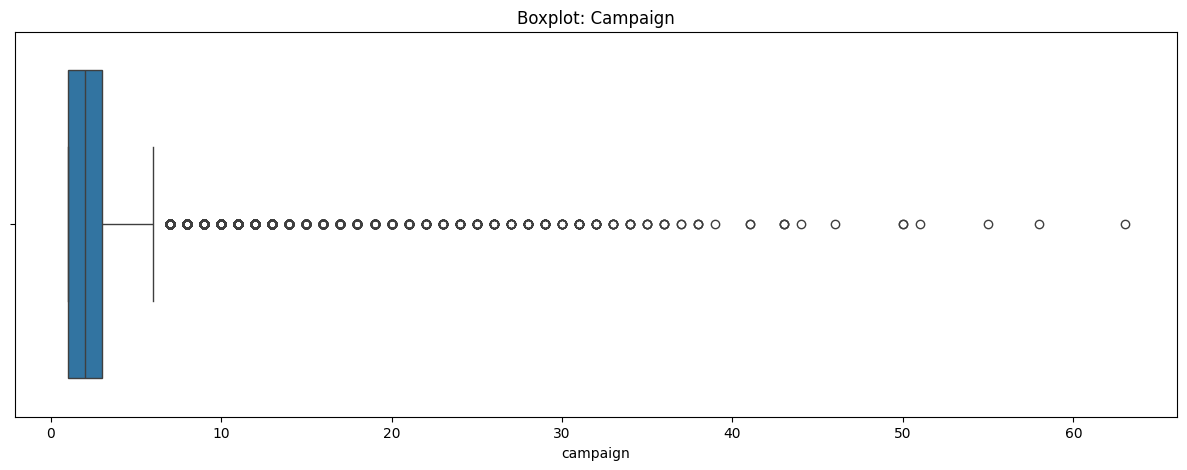

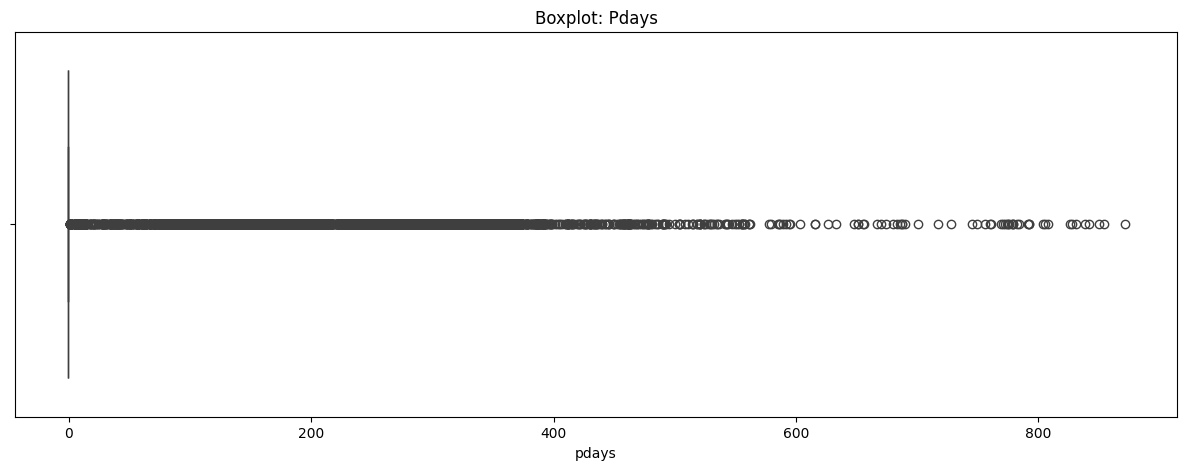

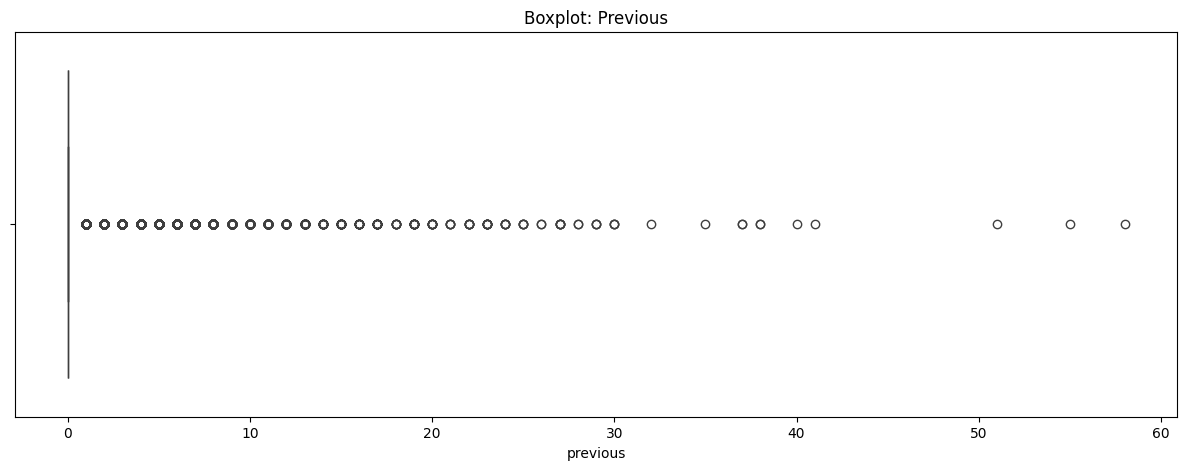

In [64]:
###
# 
###
for col in cols_num:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=col, data=df_bancos)
    plt.title(f'Boxplot: {col.capitalize()}')
    plt.show

In [43]:
###
# Filtros edad
###
print(f'Tamaño antes: {df_bancos.shape}')
df_bancos = df_bancos[df_bancos['age'] <= 80]
print(f'Tamaño despues: {df_bancos.shape}')


Tamaño antes: (45203, 17)
Tamaño despues: (45096, 17)


In [44]:
###
# Duration: Mayores de 0 y Maximo 1800
###
print(f'Tamaño antes: {df_bancos.shape}')
df_bancos = df_bancos[(df_bancos['duration'] > 0) & (df_bancos['duration'] <= 1800)]
print(f'Tamaño despues: {df_bancos.shape}')

Tamaño antes: (45096, 17)
Tamaño despues: (44985, 17)


In [46]:
###
# Previous: Maximo 80 veces
####
print(f'Tamaño antes: {df_bancos.shape}')
df_bancos = df_bancos[df_bancos['previous'] <= 80]
print(f'Tamaño despues: {df_bancos.shape}')

Tamaño antes: (44984, 17)
Tamaño despues: (44984, 17)


# 3.5 Errores tipográficos 

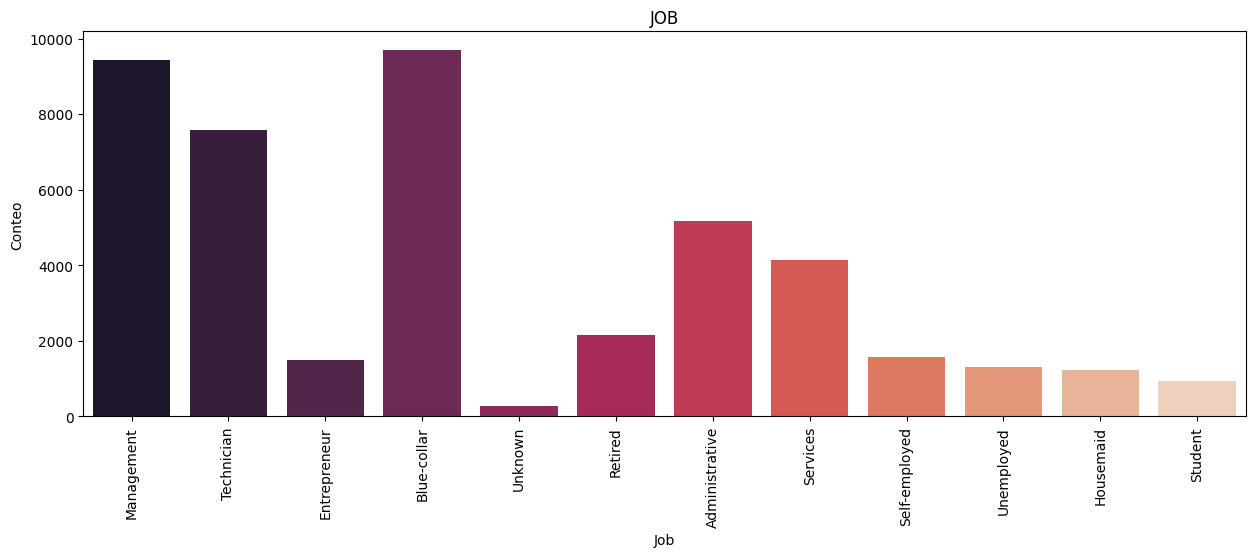

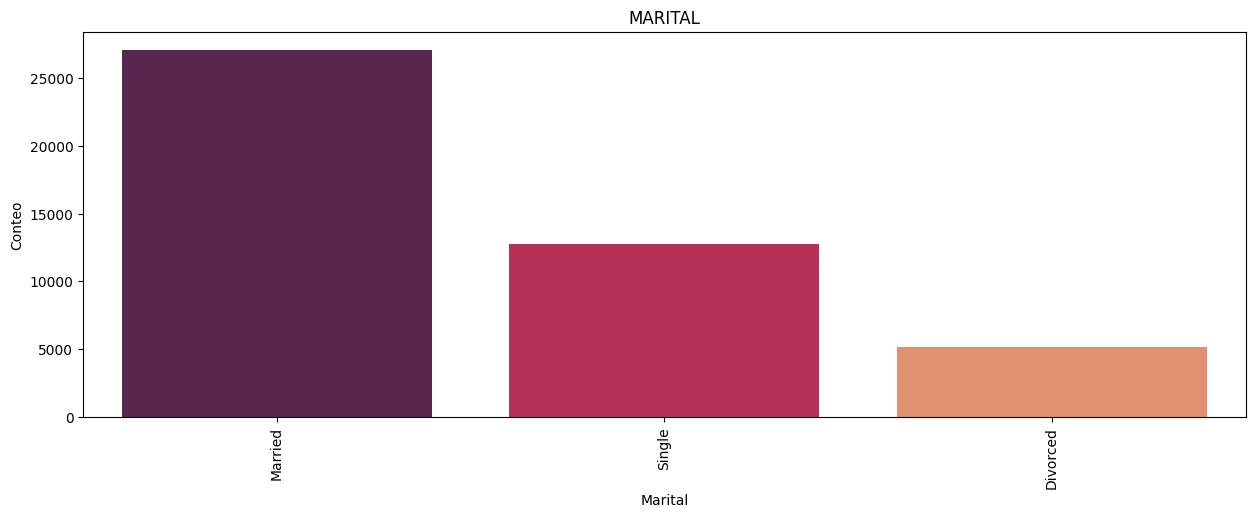

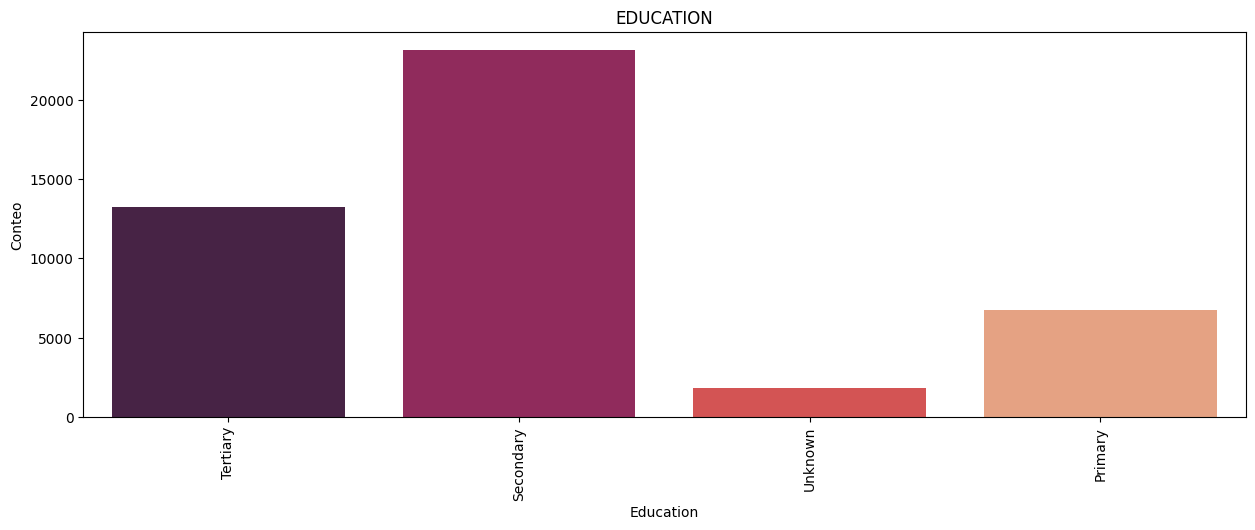

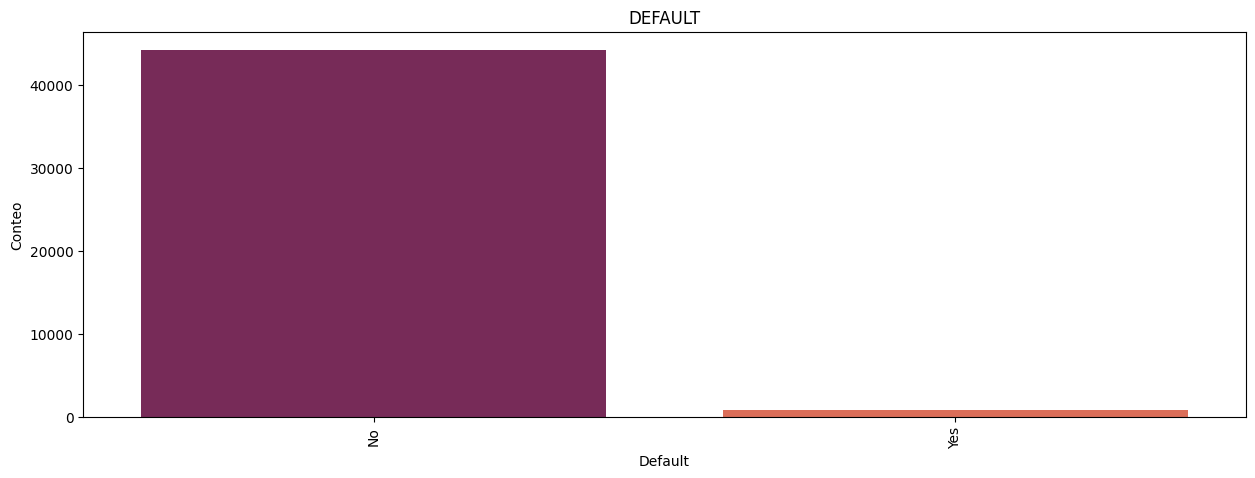

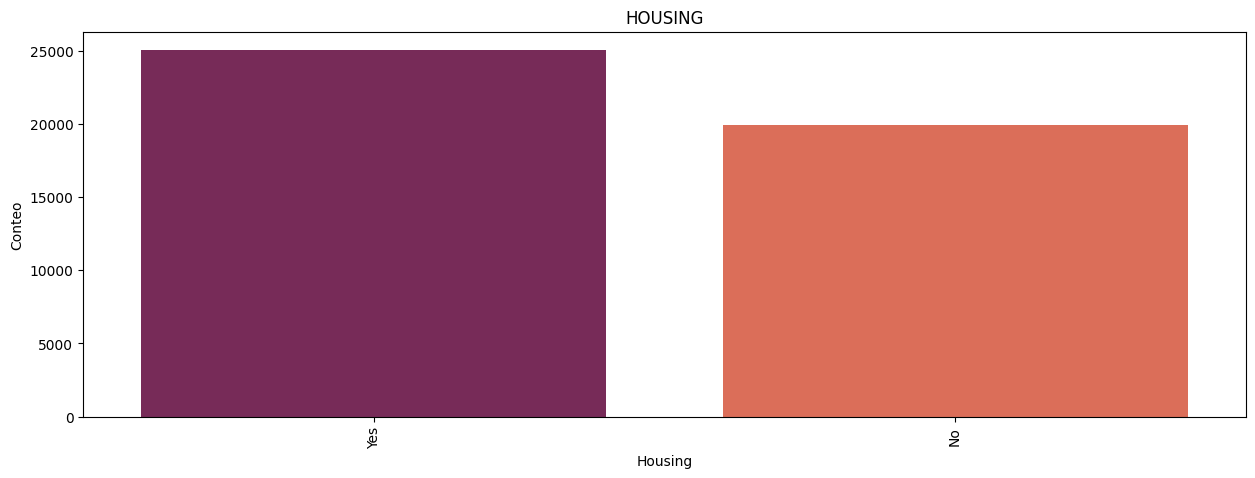

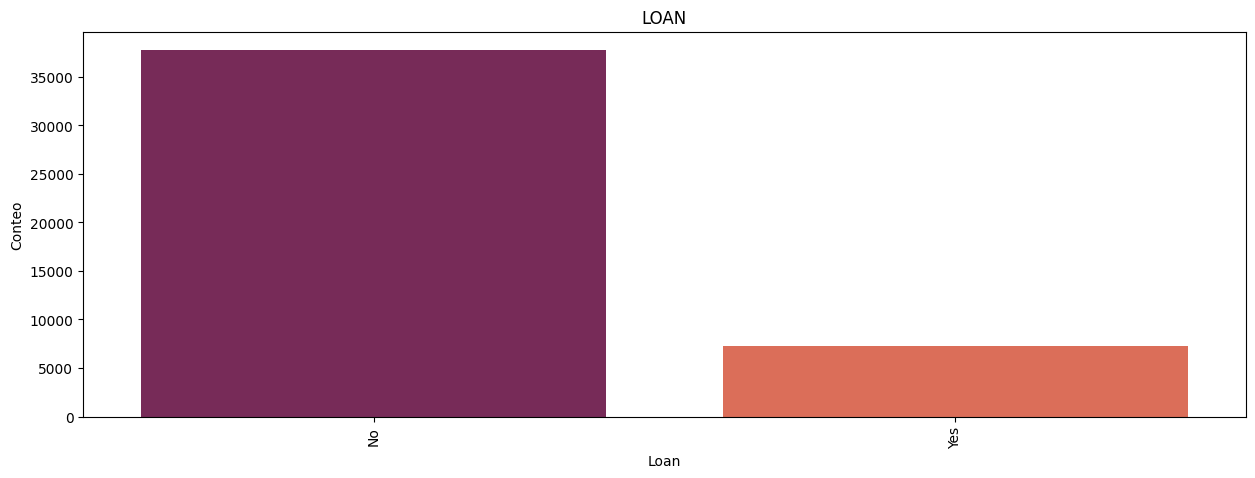

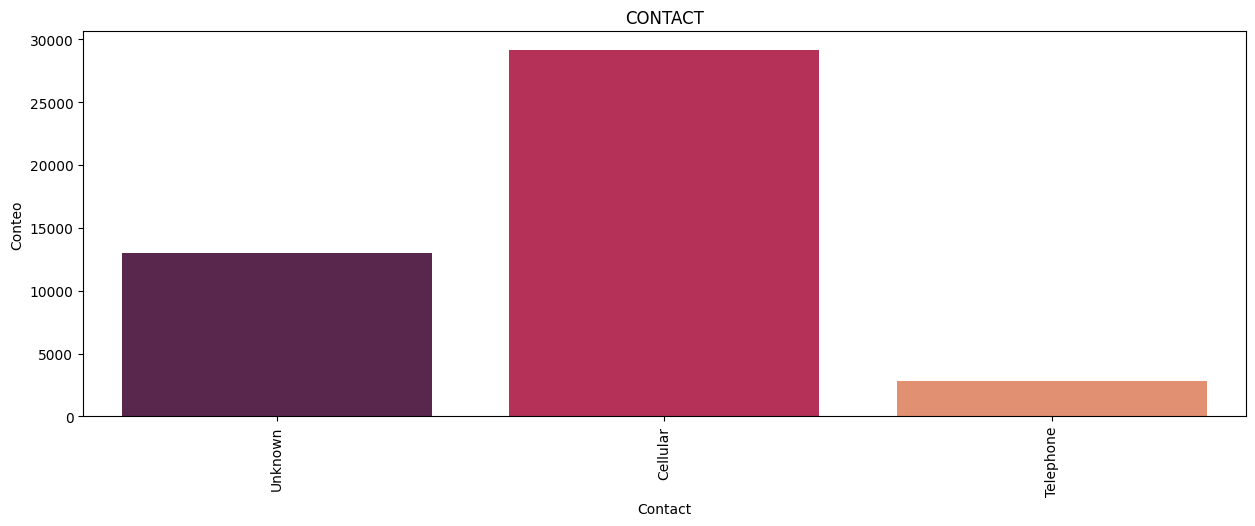

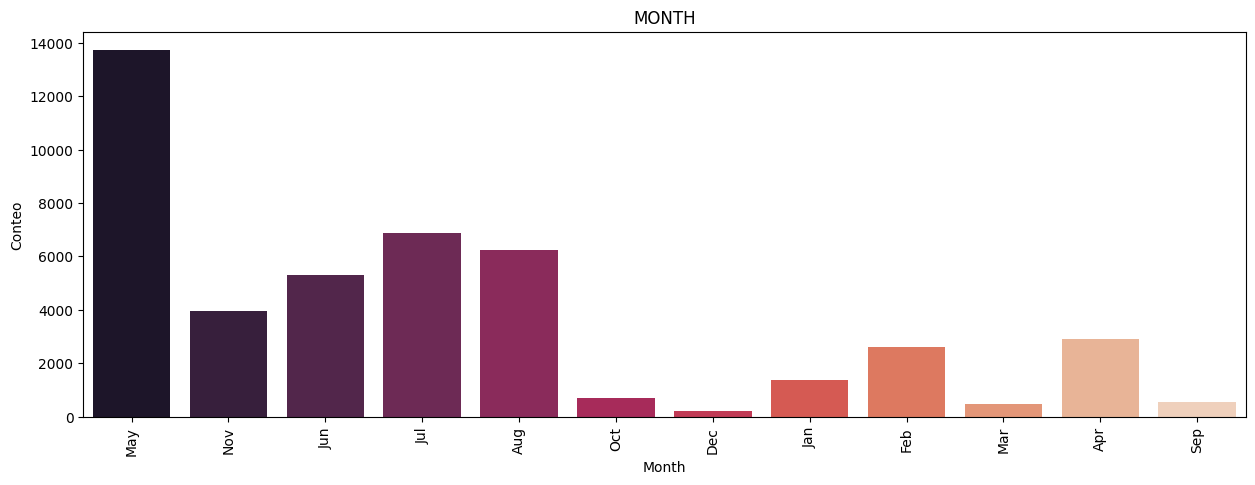

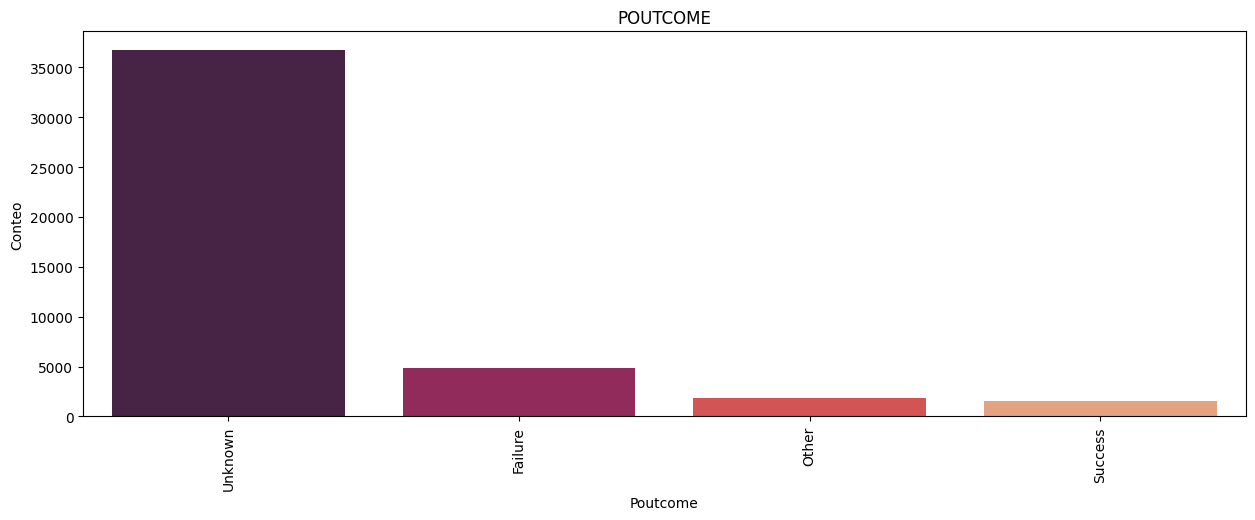

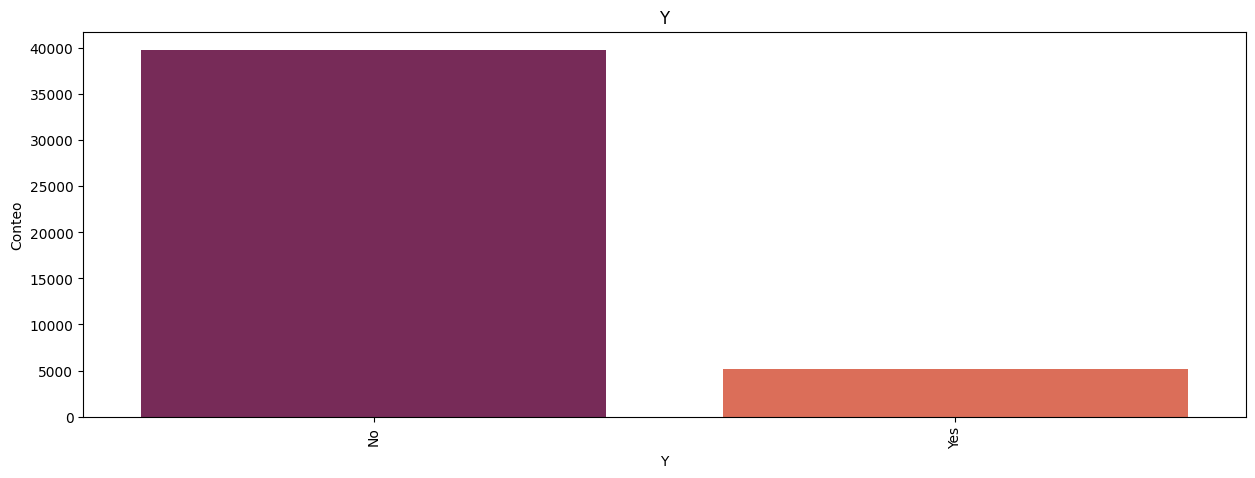

In [62]:
for col in cols_categ:
  plt.figure(figsize=(15, 5))
  sns.countplot(x=col, data=df_bancos, hue=col, palette='rocket')
  plt.title(col.upper())
  plt.xlabel(col.capitalize())
  plt.ylabel('Conteo')
  plt.xticks(rotation=90)
  plt.show()

In [48]:
###
# Un unico formato apra los textos: Capitalize
###
for col in cols_categ:
    df_bancos[col] = df_bancos[col].str.capitalize()

In [58]:
###
# Validar únicos
###
df_bancos['contact'].unique()

array(['Unknown', 'Cellular', 'Telephone', 'Phone'], dtype=object)

In [50]:
###
# Job: se va a cambiar Admin por Administrative 
###
print(f'Únicos antes: {df_bancos["job"].unique()}')
df_bancos.loc[df_bancos['job'] == 'Admin.', 'job'] = 'Administrative'
print(f'Únicos antes: {df_bancos["job"].unique()}')

Únicos antes: ['Management' 'Technician' 'Entrepreneur' 'Blue-collar' 'Unknown'
 'Retired' 'Admin.' 'Services' 'Self-employed' 'Unemployed' 'Housemaid'
 'Student' 'Administrative']
Únicos antes: ['Management' 'Technician' 'Entrepreneur' 'Blue-collar' 'Unknown'
 'Retired' 'Administrative' 'Services' 'Self-employed' 'Unemployed'
 'Housemaid' 'Student']


In [51]:
###
# Marital: se va a cambiar Div. por Divorced
###
print(f'Únicos antes: {df_bancos["marital"].unique()}')
df_bancos.loc[df_bancos['marital'] == 'Div.', 'marital'] = 'Divorced'
print(f'Únicos antes: {df_bancos["marital"].unique()}')

Únicos antes: ['Married' 'Single' 'Div.' 'Divorced']
Únicos antes: ['Married' 'Single' 'Divorced']


In [ ]:
###
# Education: se va a cambiar Sec. por Secundary y Unk por Unknown
###
print(f"Únicos antes: {df_bancos['education'].nunique()}")
df_bancos.loc[df_bancos['education'] == 'Sec.', 'education'] = 'Secondary'
df_bancos.loc[df_bancos['education'] == 'Unk', 'education'] = 'Unknown'
print(f"Únicos antes: {df_bancos['education'].nunique()}")

Únicos antes: 6
Únicos antes: 4


In [ ]:
###
# Contact: Cambiar Phone por Telephone y Mobile por Cellular
###
print(f"Únicos antes: {df_bancos['contact'].nunique()}")
df_bancos.loc[df_bancos['contact'] == 'Phone', 'contact'] = 'Telephone'
df_bancos.loc[df_bancos['contact'] == 'Mobile', 'contact'] = 'Cellular'
print(f"Únicos antes: {df_bancos['contact'].nunique()}")

Únicos antes: 4
Únicos antes: 3


In [61]:
###
# Poutcome: Cambiar Unk por Unknown
###
print(f"Únicos antes: {df_bancos['poutcome'].nunique()}")
df_bancos.loc[df_bancos['poutcome'] == 'Unk', 'poutcome'] = 'Unknown'
print(f"Únicos antes: {df_bancos['poutcome'].nunique()}")

Únicos antes: 5
Únicos antes: 4


In [63]:
df_bancos.shape

(44984, 17)

# 4. Exportar

In [ ]:
df_bancos.to_csv('../documentos/dataset_banco_clean.csv', index=False, encoding='utf-8')